# ML Project

### Data Set: heart
### Column description:
#### 
#### Age:
##### Person's Age
#### Sex: 
##### Male or female 
#### ChestPainType:
##### The most common heart problems that cause chest pain include: pericarditis – which usually causes a sudden, sharp, stabbing pain that gets worse when you breathe deeply or lie down. angina or a heart attack – which have similar symptoms but a heart attack is life-threatening.
#####  TA: typical angina
##### ATA: atypical angina
##### NAP: non-anginal pain
##### ASY: asymptomatic
#### RestingBP:
##### RestingBP is Blood Pressure when body is in resting mode and a normal blood pressure level is less than 120/80 mmHg and while your blood pressure quantifies how strong your blood moves through the blood vessels.
#### Cholesterol:
##### A total cholesterol level of less than 200 mg/dL (5.17 mmol/L) is normal. A total cholesterol level of 200 to 239 mg/dL (5.17 to 6.18 mmol/L) is borderline high. A total cholesterol level of 240 mg/dL (6.21 mmol/L) or greater is high. The total cholesterol level can be measured any time of day.
#### FastingBS:
##### The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false) restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria) thalach: The person's maximum heart rate achieved.
#### RestingECG:
##### Resting electrocardiographic results. A Diagnostic Resting ECG (electrocardiogram) records the electrical activity of your heart while you are at rest. It provides information about your heart rate and rhythm, and can also show if there is enlargement of the heart, or evidence of a previous heart attack.
##### LVH: showing probable or definite left ventricular hypertrophy by Estes’ criteria
##### normal: normal
##### ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
#### MaxHR:
##### Maximum Heart Rate
#### ExerciseAngina:
##### Exercise induced angina
#### Oldpeak:
##### ST depression induced by exercise relative to rest and range of that is between 0 to 6.
#### ST_Slope:
##### the slope of the peak exercise ST segment
#### HeartDisease:
##### This column in target that show a person have heart disease or not.

# Season 1

In [14]:
import pandas as pd
import seaborn as sb
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pylab
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score
import math
import random

## 1. Sort and clean data

In [15]:
data = pd.read_csv('heart.csv')

In [16]:
data.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [17]:
# for find sum of NULL in each column:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [18]:
# after drop NULL from main dataset we can convert string parameters to a intiger amount:
# hint: if in a column we have 3 parameter, we remove one of them. Because if don't two of them, leteraly that parameter is third. And convert each parameter to a column and we check if it is or not.
# This is done to reduce correlation.
data['Sex'] = pd.get_dummies(data.Sex)['F']
data = pd.concat([data,pd.get_dummies(data.ChestPainType)], axis = 1)
data.drop(['ChestPainType', 'ASY'], axis=1, inplace = True)
data = pd.concat([data,pd.get_dummies(data.RestingECG)], axis = 1)
data.drop(['RestingECG', 'ST'], axis=1, inplace = True)
data['ExerciseAngina'] = pd.get_dummies(data.ExerciseAngina)['Y']
data = pd.concat([data,pd.get_dummies(data.ST_Slope)], axis = 1)
data.drop(['ST_Slope', 'Down'], axis=1, inplace = True)

In [19]:
data.head(5)

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ATA,NAP,TA,LVH,Normal,Flat,Up
0,40,0,140,289,0,172,0,0.0,0,1,0,0,0,1,0,1
1,49,1,160,180,0,156,0,1.0,1,0,1,0,0,1,1,0
2,37,0,130,283,0,98,0,0.0,0,1,0,0,0,0,0,1
3,48,1,138,214,0,108,1,1.5,1,0,0,0,0,1,1,0
4,54,0,150,195,0,122,0,0.0,0,0,1,0,0,1,0,1


In [20]:
# return HeartDisease column to the end:
main_cols = ['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ATA', 'NAP', 'TA', 'LVH', 'Normal', 'Flat', 'Up', 'HeartDisease']
data = data.reindex(columns = main_cols)
data2 = data

In [21]:
data.head(5)

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ATA,NAP,TA,LVH,Normal,Flat,Up,HeartDisease
0,40,0,140,289,0,172,0,0.0,1,0,0,0,1,0,1,0
1,49,1,160,180,0,156,0,1.0,0,1,0,0,1,1,0,1
2,37,0,130,283,0,98,0,0.0,1,0,0,0,0,0,1,0
3,48,1,138,214,0,108,1,1.5,0,0,0,0,1,1,0,1
4,54,0,150,195,0,122,0,0.0,0,1,0,0,1,0,1,0


In [22]:
# this command shows a summery of dataset. For example amount of rows of each parameter and mean etc.
# One interesting thing in this dataset is most of data from men and almost men are 80 percents more than women.
data.describe()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ATA,NAP,TA,LVH,Normal,Flat,Up,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.210240,132.396514,198.799564,0.233115,136.809368,0.404139,0.887364,0.188453,0.221133,0.050109,0.204793,0.601307,0.501089,0.430283,0.553377
std,9.432617,0.407701,18.514154,109.384145,0.423046,25.460334,0.490992,1.066570,0.391287,0.415236,0.218289,0.403770,0.489896,0.500271,0.495386,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,130.000000,223.000000,0.000000,138.000000,0.000000,0.600000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,60.000000,0.000000,140.000000,267.000000,0.000000,156.000000,1.000000,1.500000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,77.000000,1.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 2. Calculate Corrilation and plot that

In [23]:
# 1. Normal Corrilation:
corr1 = data.corr()
corr1

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ATA,NAP,TA,LVH,Normal,Flat,Up,HeartDisease
Age,1.000000,-0.055750,0.254399,-0.095282,0.198039,-0.382045,0.215793,0.258612,-0.218165,-0.011335,0.032042,0.145727,-0.230566,0.185568,-0.258067,0.282039
Sex,-0.055750,1.000000,-0.005133,0.200092,-0.120076,0.189186,-0.190664,-0.105734,0.161522,0.066486,0.004031,0.049518,0.010634,-0.116077,0.150942,-0.305445
RestingBP,0.254399,-0.005133,1.000000,0.100893,0.070193,-0.112135,0.155101,0.164803,-0.046153,-0.041348,0.049855,0.053166,-0.116851,0.099207,-0.096146,0.107589
Cholesterol,-0.095282,0.200092,0.100893,1.000000,-0.260974,0.235792,-0.034166,0.050148,0.150954,-0.006634,0.017365,0.177077,-0.038470,-0.050953,0.094027,-0.232741
FastingBS,0.198039,-0.120076,0.070193,-0.260974,1.000000,-0.131438,0.060451,0.052698,-0.140514,-0.039249,0.026885,-0.011656,-0.093028,0.107006,-0.161730,0.267291
MaxHR,-0.382045,0.189186,-0.112135,0.235792,-0.131438,1.000000,-0.370425,-0.160691,0.253735,0.134580,0.100025,0.125793,0.023801,-0.342581,0.383397,-0.400421
ExerciseAngina,0.215793,-0.190664,0.155101,-0.034166,0.060451,-0.370425,1.000000,0.408752,-0.300365,-0.166030,-0.128105,-0.016382,-0.072924,0.382237,-0.455676,0.494282
Oldpeak,0.258612,-0.105734,0.164803,0.050148,0.052698,-0.160691,0.408752,1.000000,-0.262124,-0.106212,0.032231,0.086794,-0.116719,0.283295,-0.450577,0.403951
ATA,-0.218165,0.161522,-0.046153,0.150954,-0.140514,0.253735,-0.300365,-0.262124,1.000000,-0.256767,-0.110679,-0.085791,0.107941,-0.304667,0.357588,-0.401924
NAP,-0.011335,0.066486,-0.041348,-0.006634,-0.039249,0.134580,-0.166030,-0.106212,-0.256767,1.000000,-0.122381,0.035299,0.005010,-0.072031,0.093583,-0.212964


<AxesSubplot:>

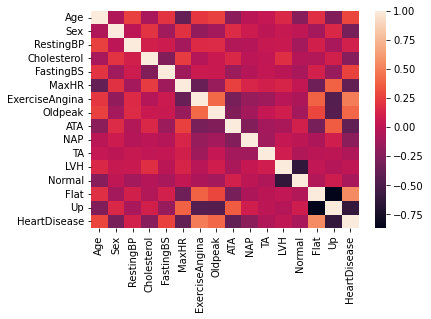

In [24]:
# In Normal Corrilation we just can find a linear relation between parameters.
# Seaborn heatmap show perfectly relation between parameters in a good range of color.
sb.heatmap(corr1)

In [25]:
# 2. Spearman Corrilation:
# But in Spearman Corrilation we can find polynominal relation between parameters.
corr2, p_val = spearmanr(data)
corr2

array([[ 1.        , -0.05993988,  0.27939008, -0.04715589,  0.20101523,
        -0.36502506,  0.21547224,  0.29825005, -0.21347097, -0.02732758,
         0.05091833,  0.15370095, -0.24057036,  0.18532186, -0.25970596,
         0.28957565],
       [-0.05993988,  1.        , -0.02681743,  0.18137011, -0.12007599,
         0.19584958, -0.1906641 , -0.11770378,  0.16152164,  0.06648605,
         0.00403109,  0.04951796,  0.01063432, -0.11607748,  0.1509421 ,
        -0.30544492],
       [ 0.27939008, -0.02681743,  1.        ,  0.10948098,  0.0660194 ,
        -0.10756612,  0.16403689,  0.17531294, -0.06410873, -0.02941771,
         0.05682928,  0.04154558, -0.1076799 ,  0.10889601, -0.09951592,
         0.1138663 ],
       [-0.04715589,  0.18137011,  0.10948098,  1.        , -0.19287096,
         0.18389978,  0.01773749,  0.05172277,  0.12347743, -0.04034215,
         0.00518911,  0.18013616, -0.05755577, -0.01358943,  0.04642652,
        -0.13987309],
       [ 0.20101523, -0.12007599,  0

<AxesSubplot:>

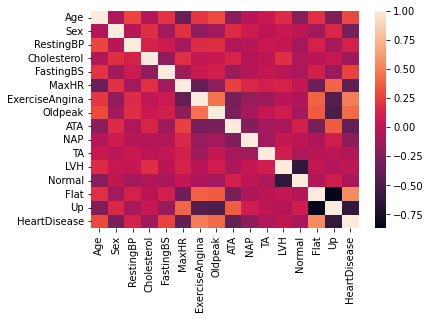

In [26]:
# xticklabels and yticklabels are to show label of parameter.
sb.heatmap(corr2, xticklabels = [i for i in data.columns], yticklabels = [i for i in data.columns])

## 3. Data Visualization

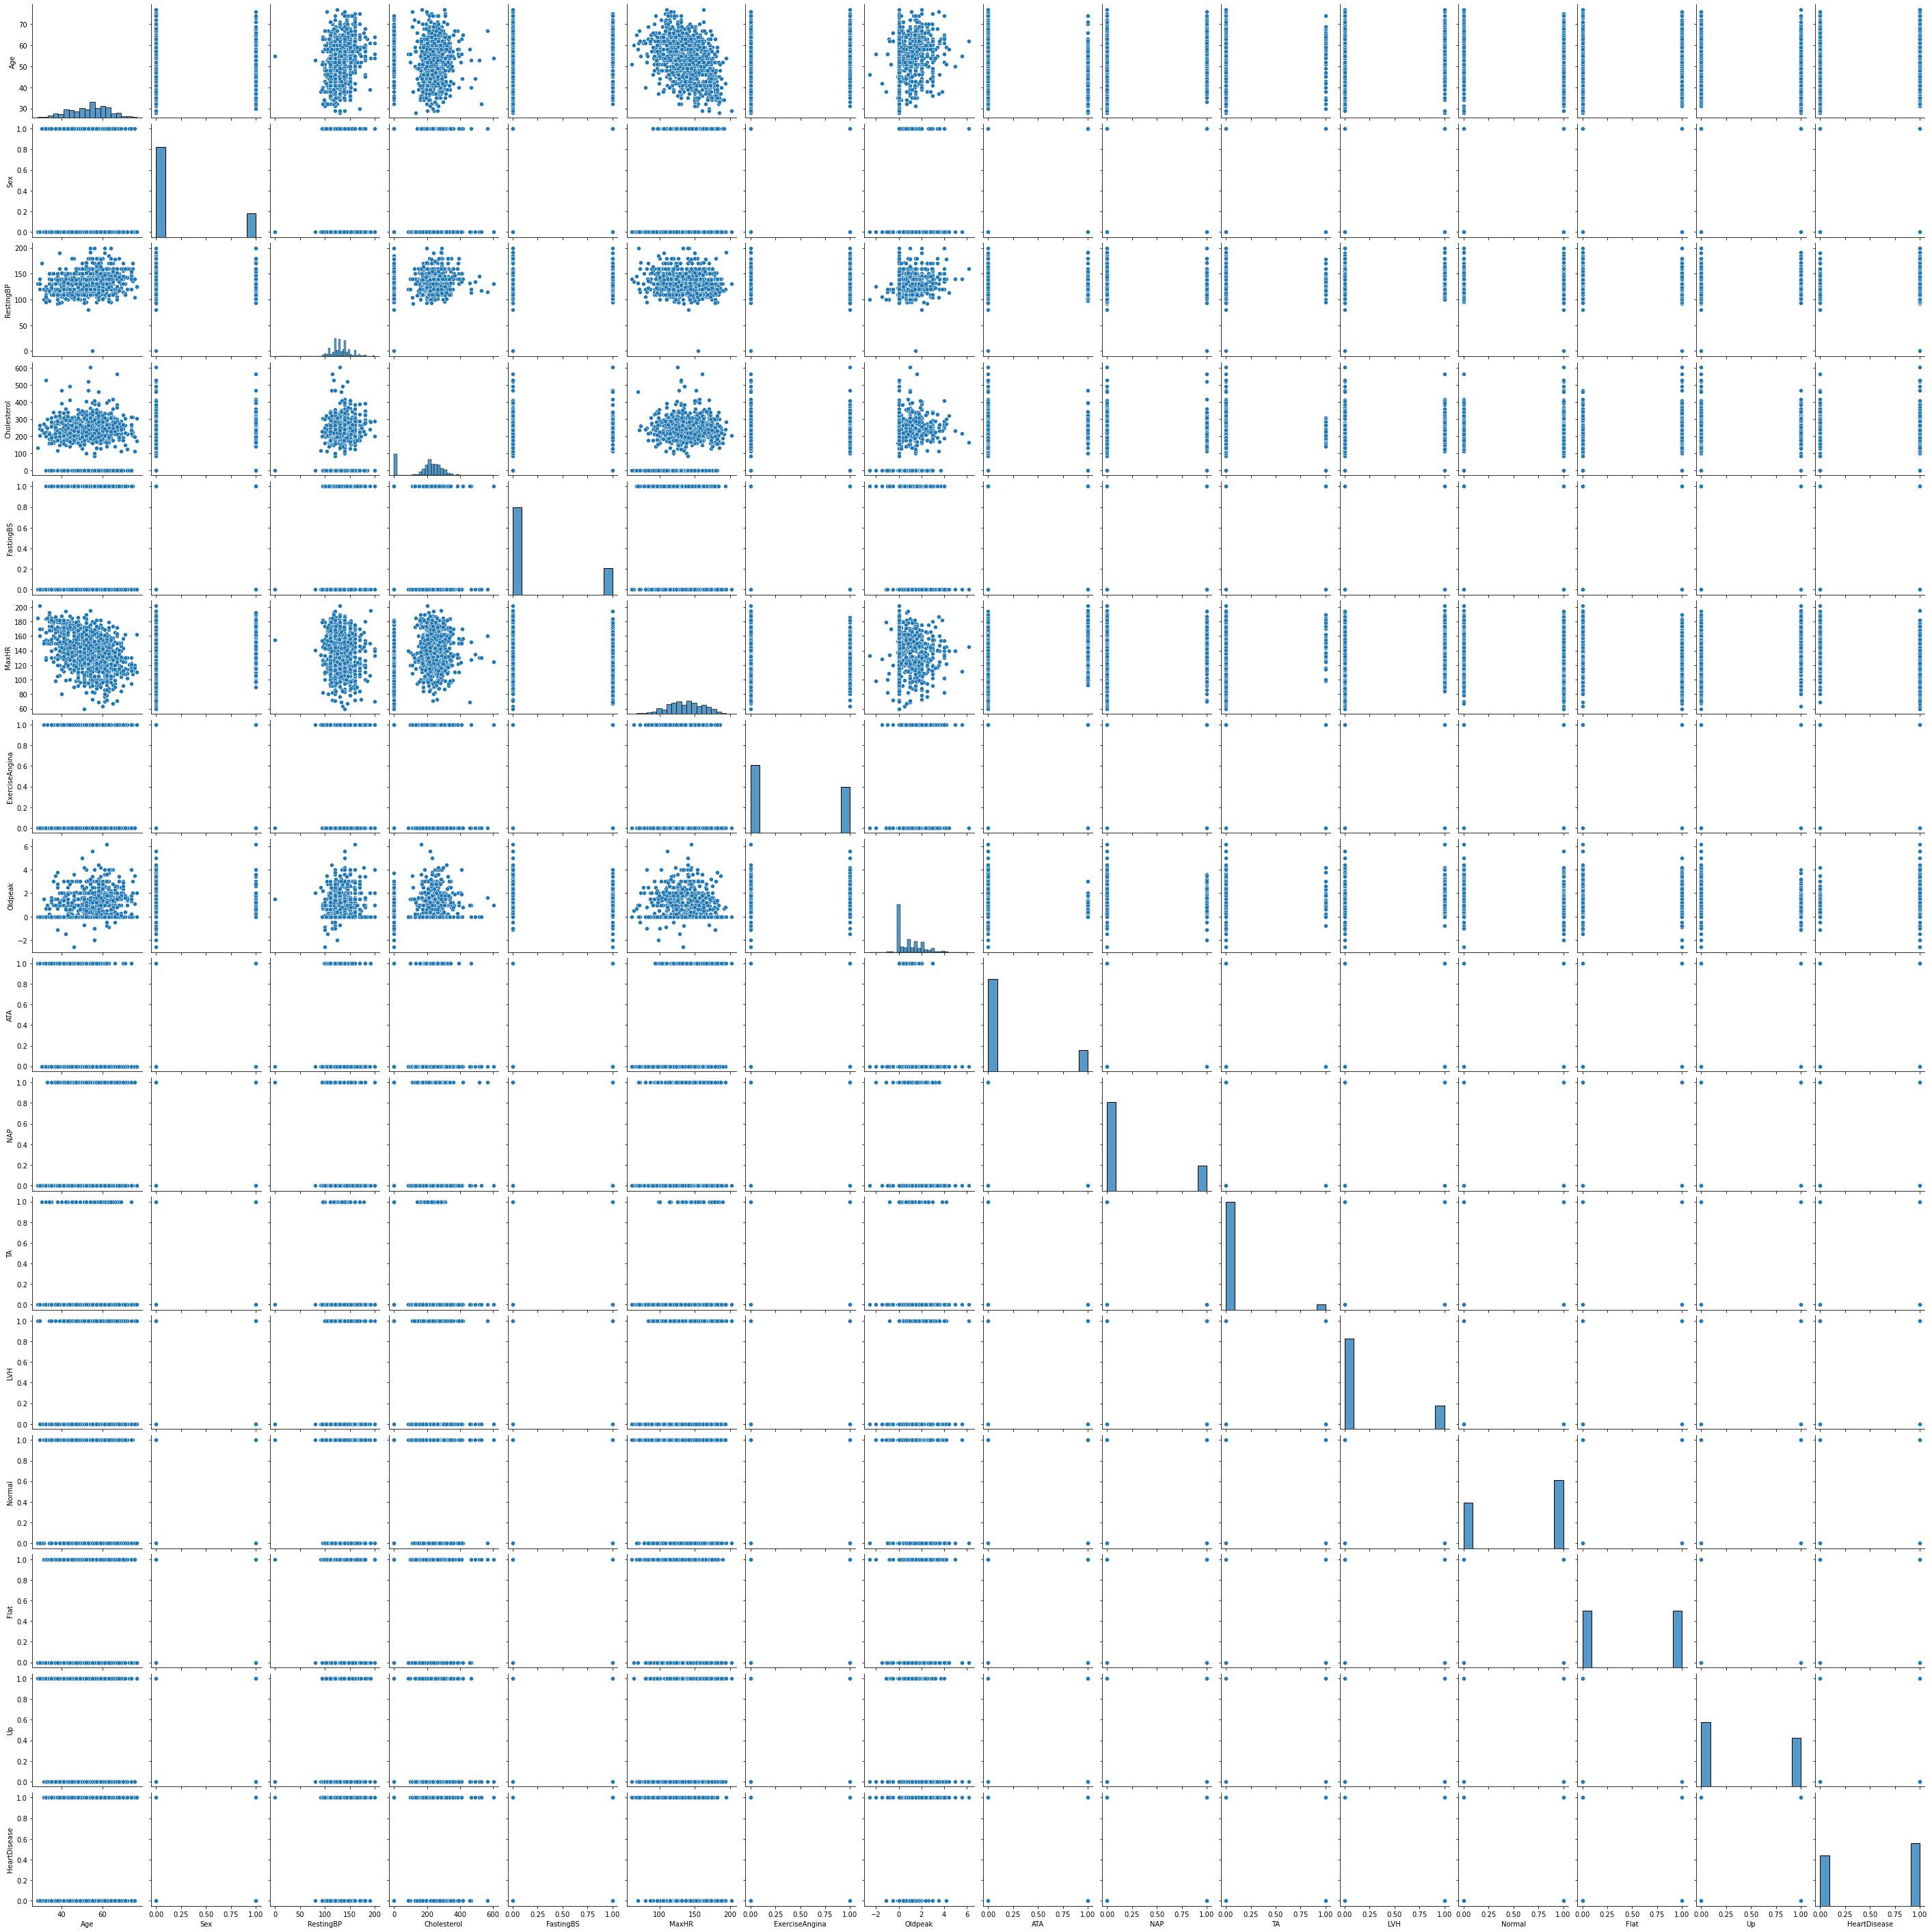

In [14]:
# this command compares 2 by 2 elemnts
sb.pairplot(data)

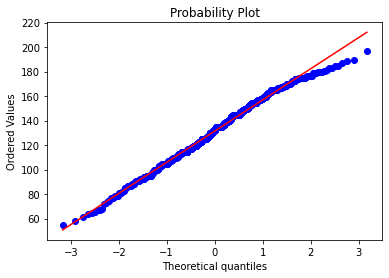

In [14]:
# Examining the Gaussian distribution
MaxHR_A = np.array(data.MaxHR)
MaxHR_A = (MaxHR_A - MaxHR_A.mean() / np.sqrt(MaxHR_A.var()))
stats.probplot(MaxHR_A, dist = 'norm', plot = pylab)
pylab.show()

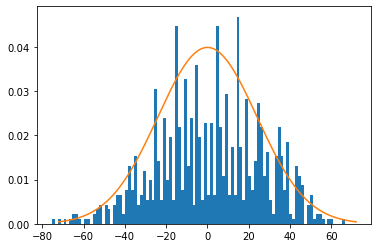

In [15]:
# plot and show Gaussian distribution
b = np.linspace(-6, 6, 10000)
c = stats.norm.pdf(b, 0, 2)
plt.hist(MaxHR_A - 130, bins = 100, weights = np.ones_like(MaxHR_A)/MaxHR_A.size)
plt.plot(b*12, c/5)

## 4. Fitting the models and checking their accuracy

#### We have a classification problem because we have only two modes. Either the person has heart disease or not.

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
             data.drop(['HeartDisease'], axis = 1), data['HeartDisease'], test_size = 0.2, random_state = 1234)

#Scaling the features in a machine learning model can improve the optimization process by making the flow of gradient descent smoother and helping algorithms reach the minimum of the cost function more quickly. 
#Without scaling features, the algorithm may be biased toward the feature with values higher in magnitude.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [96]:
# Finding best method that give us best accuracy
Best_Accuracy = {}

### 1. KNN

In [97]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

In [98]:
best_K = {}
train = 0
K = 0

# We want find best K for classification then we choose a range and check any of them. After that we compare Accuracy of them and choose best.
for k in range(2, 21):
    #if we don't use a specific K, defult is 5 
    clf = KNeighborsClassifier(n_neighbors = k, p = 2)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    ac = accuracy_score(y_test,y_pred)
    if ac > train:
        K = k
        train = ac
        best_K[k] = ac

In [99]:
print("best_K is: ", best_K)
print("K is: ", K)

best_K is:  {2: 0.8097826086956522, 3: 0.875, 4: 0.8858695652173914, 5: 0.8967391304347826, 6: 0.907608695652174, 9: 0.9184782608695652}
K is:  9


In [100]:
clf = KNeighborsClassifier(n_neighbors = K, p = 2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
ac = accuracy_score(y_test,y_pred)
Best_Accuracy['KNN'] = ac
print("accuracy score is: ", ac)

accuracy score is:  0.9184782608695652


In [101]:
print("y_test is: ", y_test)
print("y_pred is: ", y_pred)

y_test is:  581    1
623    1
60     0
613    0
40     0
      ..
421    0
416    1
544    0
392    1
588    1
Name: HeartDisease, Length: 184, dtype: int64
y_pred is:  [1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0
 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0
 0 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 1
 0 1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1]


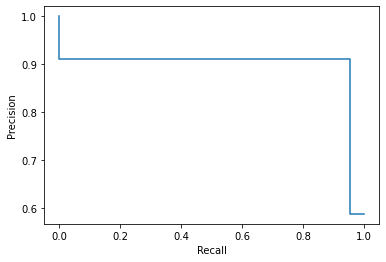

In [102]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

### 2. Random Forest

##### The Random forest classifier creates a set of decision trees from a randomly selected subset of the training set.

In [103]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
n = 2
N_e = 0
best_n_estimators = {}
train = 0

while n < 603:
    #if we don't use a specific n_estimators, defult is 100
    # n_jobs = -1 that means uses all of processors.
    # n_estimators is the number of trees in the forest.
    clf = RandomForestClassifier(n_estimators = n, n_jobs = -1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    ac = accuracy_score(y_test,y_pred)
    if ac > train:
        N_e = n
        train = ac
        best_n_estimators[n] = ac
    n = n + 20

In [105]:
print("best_n_estimators is: ", best_n_estimators)
print("n_estimators is: ", N_e)

best_n_estimators is:  {2: 0.7282608695652174, 22: 0.8695652173913043, 62: 0.9021739130434783}
n_estimators is:  62


In [106]:
clf = RandomForestClassifier(n_estimators = n, n_jobs = -1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
ac = accuracy_score(y_test,y_pred)
Best_Accuracy['Random Forest'] = ac
print("accuracy score is: ", ac)

accuracy score is:  0.9021739130434783


In [107]:
print("y_test is: ", y_test)
print("y_pred is: ", y_pred)

y_test is:  581    1
623    1
60     0
613    0
40     0
      ..
421    0
416    1
544    0
392    1
588    1
Name: HeartDisease, Length: 184, dtype: int64
y_pred is:  [1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0
 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0
 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0
 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 1
 0 1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1]


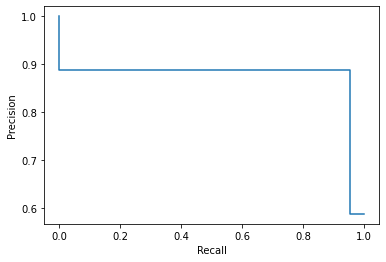

In [108]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

### 3. SVM

In [109]:
from sklearn.svm import SVC  

In [110]:
# We have 5 types kernels: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
# We don't use precomputed kernel because for precomputed kernel we must have square matrix but our matrix is non-square
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
train = 0
best_kernel = {}
B_ker = ''
for ke in kernel:
    clf = SVC(kernel = ke)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    ac = accuracy_score(y_test,y_pred)
    if ac > train:
        train = ac
        best_kernel[ke] = ac
        B_ker = ke

In [111]:
print("kernels is: ", best_kernel)
print("best kernel is: ", B_ker)

kernels is:  {'linear': 0.8804347826086957, 'rbf': 0.9021739130434783}
best kernel is:  rbf


###### RBF kernels place a radial basis function centered at each point, then perform linear manipulations to map points to higher-dimensional spaces that are easier to separate. Radial Basis Networks are simple two-layer architectures with one layer of RBF neurons and one layer of output neurons.

In [112]:
clf = SVC(kernel = B_ker)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
ac = accuracy_score(y_test,y_pred)
Best_Accuracy['SVM'] = ac
print("accuracy score is: ", ac)

accuracy score is:  0.9021739130434783


In [113]:
print("y_test is: ", y_test)
print("y_pred is: ", y_pred)

y_test is:  581    1
623    1
60     0
613    0
40     0
      ..
421    0
416    1
544    0
392    1
588    1
Name: HeartDisease, Length: 184, dtype: int64
y_pred is:  [1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0
 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0
 0 0 1 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0
 0 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 1
 0 1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1]


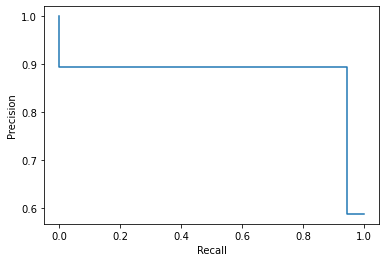

In [114]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

## 5. Implementation of animation and algorithm

In [34]:
print(Best_Accuracy)

{'KNN': 0.9184782608695652, 'Random Forest': 0.9021739130434783, 'SVM': 0.9021739130434783}


In [35]:
Best_method = ''
m = 0
for i in Best_Accuracy:
    if Best_Accuracy[i] > m:
        Best_method = i
        m = Best_Accuracy[i]
print("Best method whit highest Accuracy is: ", Best_method)

Best method whit highest Accuracy is:  KNN


###### KNN algorithm

In [187]:
type(data)

pandas.core.frame.DataFrame

In [228]:
# This part is for test a function and not it does not interfere in main algorithm.
random.seed(1234)
rand_num = random.randrange(0,918)
print(rand_num)
data_list = data.values.tolist()
X_input = data_list[rand_num]
print(X_input)

796
[56.0, 1.0, 134.0, 409.0, 0.0, 150.0, 1.0, 1.9, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0]


In [248]:

# In first step we must calculate distance:
def cal_distance(r1, r2):
    distance = 0
    for i in range(len(r1)-1):
        distance = distance + (r1[i] - r2[i])**2
    return math.sqrt(distance)

# In next step we must get neighbors:
def get_neighbors(train, test_row, num_neighbors):
    distances = []
    for train_row in train:
        dist = cal_distance(test_row, train_row)
        distances.append((train_row, dist))
        distances.sort(key=lambda tup: tup[1])
    neighbors = []
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors

# In this function we calculate maximum amount of a class and predict that:
def predict_classification(train, test_row, num_neighbors):
    neighbors = get_neighbors(train, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

# And at the end we predict model for a test data that include some rows:
def k_nearest_neighbors(train, test, num_neighbors):
    predictions = []
    for row in test:
        output = int(predict_classification(train, row, num_neighbors))
        predictions.append(output)
    return(predictions)


y_test_list = y_test.tolist()

# In this part we find best K for train KNN algorithm and calculate Accuracy:
best_K2 = {}
train2 = 0
K2 = 0
for k in range(2, 21):
    l = k_nearest_neighbors(X_train, X_test, k)
    sum_k = 0
    for i in range(len(l)):
        sum_k = sum_k + (y_test_list[i] - l[i])**2
    accuracy = sum_k / len(l)
    if accuracy > train2:
        K2 = k
        train2 = accuracy
        best_K2[k] = accuracy
        
print("best accuracy is: ", K2)
print(best_K2)

best accuracy is:  20
{2: 0.8097826086956522, 3: 0.8260869565217391, 4: 0.842391304347826, 5: 0.8478260869565217, 6: 0.8641304347826086, 7: 0.875, 10: 0.8804347826086957, 14: 0.8967391304347826, 16: 0.9021739130434783, 20: 0.907608695652174}


## 6. Dimension reduction methods and model checking

In [36]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [50]:
X = data2.drop(['HeartDisease'], axis = 1)
y = data2['HeartDisease']

###### KNN:

###### Backward feature selection:

In [92]:
# Backward for knn:
sc = StandardScaler()
I = 0
train2 = 0
best_ki = {}
# We don't want use 15 features, so in below for loop we don't use i = 15:
for i in range(1, 15):
    clf_knn = KNeighborsClassifier(n_neighbors = K, p = 2)
    # defult of scoring is on accuracy so we don't change that.
    # verbose is for shows details.
    sfs_knn1 = sfs(clf_knn, k_features=i, forward=False, verbose=0, n_jobs=-1)
    sfs_knn1.fit(X, y)
    feat_names = list(sfs_knn1.k_feature_names_)
    new_data = data2[feat_names]
    new_data['HeartDisease'] = data2['HeartDisease']
    
    X_train_sfs1, X_test_sfs1, y_train_sfs1, y_test_sfs1 = train_test_split(
                 new_data.drop(['HeartDisease'], axis = 1), new_data['HeartDisease'], test_size = 0.2, random_state = 1234)

    #Scaling the features in a machine learning model can improve the optimization process by making the flow of gradient descent smoother and helping algorithms reach the minimum of the cost function more quickly. 
    #Without scaling features, the algorithm may be biased toward the feature with values higher in magnitude.

    X_train_sfs1 = sc.fit_transform(X_train_sfs1)
    X_test_sfs1 = sc.transform(X_test_sfs1)
    best_K = {}
    train = 0
    K = 0

    # We want find best K for classification then we choose a range and check any of them. After that we compare Accuracy of them and choose best.
    for k in range(2, 21):
        #if we don't use a specific K, defult is 5 
        clf = KNeighborsClassifier(n_neighbors = k, p = 2)
        clf.fit(X_train_sfs1, y_train_sfs1)
        y_pred = clf.predict(X_test_sfs1)
        ac = accuracy_score(y_test_sfs1,y_pred)
        if ac > train:
            K = k
            train = ac
            best_K[k] = ac
            
    if train > train2:
        I = i
        train2 = train
        best_ki[i] = train

C:\Users\SEPEHR\AppData\Local\Temp/ipykernel_7996/2657910177.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['HeartDisease'] = data2['HeartDisease']
C:\Users\SEPEHR\AppData\Local\Temp/ipykernel_7996/2657910177.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['HeartDisease'] = data2['HeartDisease']
C:\Users\SEPEHR\AppData\Local\Temp/ipykernel_7996/2657910177.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [93]:
print("best_ki is: ", best_ki)
print("best i is:", I)

best_ki is:  {1: 0.8532608695652174, 5: 0.8695652173913043, 6: 0.8858695652173914, 10: 0.8913043478260869, 12: 0.9021739130434783}
best i is: 12


In [95]:
clf_knn = KNeighborsClassifier(n_neighbors = K, p = 2)
# defult of scoring is on accuracy so we don't change that.
# verbose is for shows details.
sfs_knn1 = sfs(clf_knn, k_features=I, forward=False, verbose=0, n_jobs=-1)
sfs_knn1.fit(X, y)
feat_names = list(sfs_knn1.k_feature_names_)
new_data = data2[feat_names]
new_data['HeartDisease'] = data2['HeartDisease']

X_train_sfs1, X_test_sfs1, y_train_sfs1, y_test_sfs1 = train_test_split(
             new_data.drop(['HeartDisease'], axis = 1), new_data['HeartDisease'], test_size = 0.2, random_state = 1234)

#Scaling the features in a machine learning model can improve the optimization process by making the flow of gradient descent smoother and helping algorithms reach the minimum of the cost function more quickly. 
#Without scaling features, the algorithm may be biased toward the feature with values higher in magnitude.

X_train_sfs1 = sc.fit_transform(X_train_sfs1)
X_test_sfs1 = sc.transform(X_test_sfs1)
best_K = {}
train = 0
K = 0

# We want find best K for classification then we choose a range and check any of them. After that we compare Accuracy of them and choose best.
for k in range(2, 21):
    #if we don't use a specific K, defult is 5 
    clf = KNeighborsClassifier(n_neighbors = k, p = 2)
    clf.fit(X_train_sfs1, y_train_sfs1)
    y_pred = clf.predict(X_test_sfs1)
    ac = accuracy_score(y_test_sfs1,y_pred)
    if ac > train:
        K = k
        train = ac
        best_K[k] = ac

C:\Users\SEPEHR\AppData\Local\Temp/ipykernel_7996/1147017568.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['HeartDisease'] = data2['HeartDisease']


In [97]:
print("best_K is: ", best_K)
print("K is: ", K)

best_K is:  {2: 0.8315217391304348, 3: 0.8641304347826086, 5: 0.875, 7: 0.8858695652173914, 13: 0.8967391304347826, 18: 0.9021739130434783}
K is:  18


In [98]:
clf = KNeighborsClassifier(n_neighbors = K, p = 2)
clf.fit(X_train_sfs1, y_train_sfs1)
y_pred = clf.predict(X_test_sfs1)
ac = accuracy_score(y_test_sfs1,y_pred)
print("accuracy score is: ", ac)

accuracy score is:  0.9021739130434783


In [100]:
print("y_test is: ", y_test_sfs1)
print("y_pred is: ", y_pred)

y_test is:  581    1
623    1
60     0
613    0
40     0
      ..
421    0
416    1
544    0
392    1
588    1
Name: HeartDisease, Length: 184, dtype: int64
y_pred is:  [1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 0 1 1 1 1 0
 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0
 0 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 1
 0 1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1]


###### From this, we conclude that by reducing the number of features, the number of neighbors should be increased to achieve greater accuracy.

###### Forward feature selection:

In [101]:
# Forward for knn:
sc = StandardScaler()
I = 0
train2 = 0
best_ki = {}
# We don't want use 15 features, so in below for loop we don't use i = 15:
for i in range(1, 15):
    clf_knn = KNeighborsClassifier(n_neighbors = K, p = 2)
    # defult of scoring is on accuracy so we don't change that.
    # verbose is for shows details.
    sfs_knn1 = sfs(clf_knn, k_features=i, forward=True, verbose=0, n_jobs=-1)
    sfs_knn1.fit(X, y)
    feat_names = list(sfs_knn1.k_feature_names_)
    new_data = data2[feat_names]
    new_data['HeartDisease'] = data2['HeartDisease']
    
    X_train_sfs1, X_test_sfs1, y_train_sfs1, y_test_sfs1 = train_test_split(
                 new_data.drop(['HeartDisease'], axis = 1), new_data['HeartDisease'], test_size = 0.2, random_state = 1234)

    #Scaling the features in a machine learning model can improve the optimization process by making the flow of gradient descent smoother and helping algorithms reach the minimum of the cost function more quickly. 
    #Without scaling features, the algorithm may be biased toward the feature with values higher in magnitude.

    X_train_sfs1 = sc.fit_transform(X_train_sfs1)
    X_test_sfs1 = sc.transform(X_test_sfs1)
    best_K = {}
    train = 0
    K = 0

    # We want find best K for classification then we choose a range and check any of them. After that we compare Accuracy of them and choose best.
    for k in range(2, 21):
        #if we don't use a specific K, defult is 5 
        clf = KNeighborsClassifier(n_neighbors = k, p = 2)
        clf.fit(X_train_sfs1, y_train_sfs1)
        y_pred = clf.predict(X_test_sfs1)
        ac = accuracy_score(y_test_sfs1,y_pred)
        if ac > train:
            K = k
            train = ac
            best_K[k] = ac
            
    if train > train2:
        I = i
        train2 = train
        best_ki[i] = train

C:\Users\SEPEHR\AppData\Local\Temp/ipykernel_7996/2052733843.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['HeartDisease'] = data2['HeartDisease']
C:\Users\SEPEHR\AppData\Local\Temp/ipykernel_7996/2052733843.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['HeartDisease'] = data2['HeartDisease']
C:\Users\SEPEHR\AppData\Local\Temp/ipykernel_7996/2052733843.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [102]:
print("best_ki is: ", best_ki)
print("best i is:", I)

best_ki is:  {1: 0.8532608695652174, 3: 0.8586956521739131, 4: 0.8913043478260869, 10: 0.8967391304347826, 12: 0.9021739130434783}
best i is: 12


In [103]:
clf_knn = KNeighborsClassifier(n_neighbors = K, p = 2)
# defult of scoring is on accuracy so we don't change that.
# verbose is for shows details.
sfs_knn1 = sfs(clf_knn, k_features=I, forward=False, verbose=0, n_jobs=-1)
sfs_knn1.fit(X, y)
feat_names = list(sfs_knn1.k_feature_names_)
new_data = data2[feat_names]
new_data['HeartDisease'] = data2['HeartDisease']

X_train_sfs1, X_test_sfs1, y_train_sfs1, y_test_sfs1 = train_test_split(
             new_data.drop(['HeartDisease'], axis = 1), new_data['HeartDisease'], test_size = 0.2, random_state = 1234)

#Scaling the features in a machine learning model can improve the optimization process by making the flow of gradient descent smoother and helping algorithms reach the minimum of the cost function more quickly. 
#Without scaling features, the algorithm may be biased toward the feature with values higher in magnitude.

X_train_sfs1 = sc.fit_transform(X_train_sfs1)
X_test_sfs1 = sc.transform(X_test_sfs1)
best_K = {}
train = 0
K = 0

# We want find best K for classification then we choose a range and check any of them. After that we compare Accuracy of them and choose best.
for k in range(2, 21):
    #if we don't use a specific K, defult is 5 
    clf = KNeighborsClassifier(n_neighbors = k, p = 2)
    clf.fit(X_train_sfs1, y_train_sfs1)
    y_pred = clf.predict(X_test_sfs1)
    ac = accuracy_score(y_test_sfs1,y_pred)
    if ac > train:
        K = k
        train = ac
        best_K[k] = ac

C:\Users\SEPEHR\AppData\Local\Temp/ipykernel_7996/1147017568.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['HeartDisease'] = data2['HeartDisease']


In [104]:
print("best_K is: ", best_K)
print("K is: ", K)

best_K is:  {2: 0.8315217391304348, 3: 0.8641304347826086, 5: 0.875, 7: 0.8858695652173914, 13: 0.8967391304347826, 18: 0.9021739130434783}
K is:  18


In [105]:
clf = KNeighborsClassifier(n_neighbors = K, p = 2)
clf.fit(X_train_sfs1, y_train_sfs1)
y_pred = clf.predict(X_test_sfs1)
ac = accuracy_score(y_test_sfs1,y_pred)
print("accuracy score is: ", ac)

accuracy score is:  0.9021739130434783


In [106]:
print("y_test is: ", y_test_sfs1)
print("y_pred is: ", y_pred)

y_test is:  581    1
623    1
60     0
613    0
40     0
      ..
421    0
416    1
544    0
392    1
588    1
Name: HeartDisease, Length: 184, dtype: int64
y_pred is:  [1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 0 1 1 1 1 0
 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0
 0 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 1
 0 1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1]


###### From this, we conclude that by reducing the number of features, the number of neighbors should be increased to achieve greater accuracy.

## 7. Investigating the optimality of the k parameter in the k-fold cross-validation method

In [107]:
X = data2.drop(['HeartDisease'], axis = 1)
y = data2['HeartDisease']

In [109]:
from sklearn.model_selection import cross_validate

In [137]:
def cross_validation(model, X1, y1, cv1):
    results = cross_validate(estimator=model,
                               X = X1,
                               y = y1,
                               # cv is the number of folds for cross-validation.
                               cv = cv1,
                               scoring = 'accuracy',
                               return_train_score = True)
#     return results
    return results['train_score'].mean()

In [140]:
# At above we find best k dor knn is 9.
clf = KNeighborsClassifier(n_neighbors = 9, p = 2)
# For find best k-fold we try for any of them:
best_kfold = 0
k_accu = 0
for i in range(2, 50):
    x = cross_validation(clf, X, y, i)
    if x > k_accu:
        best_kfold = i
        k_accu = x
print("The most optimal value of k-fold is {0}. With Acuuracy {1}.".format(best_kfold, k_accu))

The most optimal value of k-fold is 3. With Acuuracy 0.7717864923747276.


## 8. Use bootstrap

In [197]:
data2.shape

(918, 16)

In [141]:
type(data2)

pandas.core.frame.DataFrame

In [144]:
type(data2.shape[0])

int

In [165]:
np.random.seed(1234)
remove_n = int(data2.shape[0] * 0.8)
drop_indices = np.random.choice(data2.index, remove_n, replace=False)
data2_subset = data2.drop(drop_indices)
data2_subset.shape

(184, 16)

In [166]:
from scipy.stats import bootstrap

In [167]:
data2_subset.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ATA,NAP,TA,LVH,Normal,Flat,Up,HeartDisease
1,49,1,160,180,0,156,0,1.0,0,1,0,0,1,1,0,1
3,48,1,138,214,0,108,1,1.5,0,0,0,0,1,1,0,1
4,54,0,150,195,0,122,0,0.0,0,1,0,0,1,0,1,0
10,37,1,130,211,0,142,0,0.0,0,1,0,0,1,0,1,0
14,42,1,115,211,0,137,0,0.0,0,1,0,0,0,0,1,0


In [174]:
data2_subset.sample(int(data2.shape[0] * 0.2)+1)

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ATA,NAP,TA,LVH,Normal,Flat,Up,HeartDisease
3,48,1,138,214,0,108,1,1.5,0,0,0,0,1,1,0,1
346,59,0,120,0,0,115,0,0.0,0,0,0,0,1,1,0,1
506,75,0,136,225,0,112,1,3.0,0,0,0,0,1,1,0,1
439,74,0,138,0,0,116,0,0.2,0,1,0,0,1,0,1,0
325,42,0,105,0,1,128,1,-1.5,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,47,1,135,248,1,170,0,0.0,0,1,0,0,1,1,0,1
318,61,0,130,0,1,77,0,2.5,0,0,0,0,1,1,0,1
45,59,0,130,318,0,120,1,1.0,0,1,0,0,1,1,0,0
374,61,0,125,0,0,105,1,0.0,0,0,0,0,1,0,0,1


In [203]:
# Create a dataframe that it complate data2_subset:
bootstrap=pd.DataFrame({'Age':[int(np.round(data2_subset.sample(int(data2.shape[0] * 0.2)+1,replace=True)['Age'].mean())) for i in range(int(data2.shape[0] * 0.2),data2.shape[0] - 1)],
                       'Sex':[int(np.round(data2_subset.sample(int(data2.shape[0] * 0.2)+1,replace=True)['Sex'].mean())) for i in range(int(data2.shape[0] * 0.2),data2.shape[0] - 1)],
                       'RestingBP':[int(np.round(data2_subset.sample(int(data2.shape[0] * 0.2)+1,replace=True)['RestingBP'].mean())) for i in range(int(data2.shape[0] * 0.2),data2.shape[0] - 1)],
                       'Cholesterol':[int(np.round(data2_subset.sample(int(data2.shape[0] * 0.2)+1,replace=True)['Cholesterol'].mean())) for i in range(int(data2.shape[0] * 0.2),data2.shape[0] - 1)],
                       'FastingBS':[int(np.round(data2_subset.sample(int(data2.shape[0] * 0.2)+1,replace=True)['FastingBS'].mean())) for i in range(int(data2.shape[0] * 0.2),data2.shape[0] - 1)],
                       'MaxHR':[int(np.round(data2_subset.sample(int(data2.shape[0] * 0.2)+1,replace=True)['MaxHR'].mean())) for i in range(int(data2.shape[0] * 0.2),data2.shape[0] - 1)],
                       'ExerciseAngina':[int(np.round(data2_subset.sample(int(data2.shape[0] * 0.2)+1,replace=True)['ExerciseAngina'].mean())) for i in range(int(data2.shape[0] * 0.2),data2.shape[0] - 1)],
                       'Oldpeak':[data2_subset.sample(int(data2.shape[0] * 0.2)+1,replace=True)['Oldpeak'].mean() for i in range(int(data2.shape[0] * 0.2),data2.shape[0] - 1)],
                       'ATA':[int(np.round(data2_subset.sample(int(data2.shape[0] * 0.2)+1,replace=True)['ATA'].mean())) for i in range(int(data2.shape[0] * 0.2),data2.shape[0] - 1)],
                       'NAP':[int(np.round(data2_subset.sample(int(data2.shape[0] * 0.2)+1,replace=True)['NAP'].mean())) for i in range(int(data2.shape[0] * 0.2),data2.shape[0] - 1)],
                       'TA':[int(np.round(data2_subset.sample(int(data2.shape[0] * 0.2)+1,replace=True)['TA'].mean())) for i in range(int(data2.shape[0] * 0.2),data2.shape[0] - 1)],
                       'LVH':[int(np.round(data2_subset.sample(int(data2.shape[0] * 0.2)+1,replace=True)['LVH'].mean())) for i in range(int(data2.shape[0] * 0.2),data2.shape[0] - 1)],
                       'Normal':[int(np.round(data2_subset.sample(int(data2.shape[0] * 0.2)+1,replace=True)['Normal'].mean())) for i in range(int(data2.shape[0] * 0.2),data2.shape[0] - 1)],
                       'Flat':[int(np.round(data2_subset.sample(int(data2.shape[0] * 0.2)+1,replace=True)['Flat'].mean())) for i in range(int(data2.shape[0] * 0.2),data2.shape[0] - 1)],
                       'Up':[int(np.round(data2_subset.sample(int(data2.shape[0] * 0.2)+1,replace=True)['Up'].mean())) for i in range(int(data2.shape[0] * 0.2),data2.shape[0] - 1)],
                       'HeartDisease':[int(np.round(data2_subset.sample(int(data2.shape[0] * 0.2)+1,replace=True)['HeartDisease'].mean())) for i in range(int(data2.shape[0] * 0.2),data2.shape[0] - 1)]
                       })

In [204]:
bootstrap.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ATA,NAP,TA,LVH,Normal,Flat,Up,HeartDisease
0,54,0,133,201,0,137,0,0.890217,0,0,0,0,1,0,1,1
1,54,0,132,202,0,137,0,0.739674,0,0,0,0,1,0,0,0
2,55,0,135,205,0,136,0,0.839674,0,0,0,0,1,0,0,0
3,54,0,132,196,0,135,0,0.772826,0,0,0,0,1,0,1,1
4,54,0,135,214,0,136,0,0.836413,0,0,0,0,1,0,0,1


In [205]:
bootstrap.shape

(734, 16)

In [206]:
# merge 2 datframe and fix them:
frames = [data2_subset, bootstrap]
result = pd.concat(frames)
result.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ATA,NAP,TA,LVH,Normal,Flat,Up,HeartDisease
1,49,1,160,180,0,156,0,1.0,0,1,0,0,1,1,0,1
3,48,1,138,214,0,108,1,1.5,0,0,0,0,1,1,0,1
4,54,0,150,195,0,122,0,0.0,0,1,0,0,1,0,1,0
10,37,1,130,211,0,142,0,0.0,0,1,0,0,1,0,1,0
14,42,1,115,211,0,137,0,0.0,0,1,0,0,0,0,1,0


In [207]:
result.shape

(918, 16)

In [209]:
X_train_bs, X_test_bs, y_train_bs, y_test_bs = train_test_split(
             result.drop(['HeartDisease'], axis = 1), result['HeartDisease'], test_size = 0.2, random_state = 1234)

#Scaling the features in a machine learning model can improve the optimization process by making the flow of gradient descent smoother and helping algorithms reach the minimum of the cost function more quickly. 
#Without scaling features, the algorithm may be biased toward the feature with values higher in magnitude.
sc = StandardScaler()
X_train_bs = sc.fit_transform(X_train_bs)
X_test_bs = sc.transform(X_test_bs)

In [210]:
best_K = {}
train = 0
K = 0

# We want find best K for classification then we choose a range and check any of them. After that we compare Accuracy of them and choose best.
for k in range(2, 21):
    #if we don't use a specific K, defult is 5 
    clf = KNeighborsClassifier(n_neighbors = k, p = 2)
    clf.fit(X_train_bs, y_train_bs)
    y_pred = clf.predict(X_test_bs)
    ac = accuracy_score(y_test_bs,y_pred)
    if ac > train:
        K = k
        train = ac
        best_K[k] = ac

In [211]:
print("best_K is: ", best_K)
print("K is: ", K)

best_K is:  {2: 0.625, 3: 0.7010869565217391, 6: 0.7065217391304348, 7: 0.7228260869565217, 8: 0.7282608695652174, 13: 0.7336956521739131}
K is:  13


In [213]:
clf = KNeighborsClassifier(n_neighbors = K, p = 2)
clf.fit(X_train_bs, y_train_bs)
y_pred = clf.predict(X_test_bs)
ac = accuracy_score(y_test_bs,y_pred)
print("accuracy score is: ", ac)

accuracy score is:  0.7336956521739131


In [214]:
print("y_test is: ", y_test_bs)
print("y_pred is: ", y_pred)

y_test is:  397    0
439    1
311    1
429    1
211    1
      ..
237    0
232    1
360    1
208    0
404    1
Name: HeartDisease, Length: 184, dtype: int64
y_pred is:  [1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1]


###### We notice that the accuracy decreases by using the bootstrap method.

## 9. Variance and bias check

###### Bagging helps reduce the variance while boosting reduces bias.

In [12]:
from mlxtend.evaluate import bias_variance_decomp
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [49]:
tree = DecisionTreeClassifier(random_state=1234)

X_train=X_train.tolist()
X_test=X_test.tolist()
y_train=y_train.tolist()
y_test=y_test.tolist()

X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)


avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        tree, X_train, y_train, X_test, y_test, 
        random_seed=1234)

print('Average bias: ', avg_bias)
print('Average variance: ', avg_var)

Average bias:  0.1358695652173913
Average variance:  0.14660326086956524


In [50]:
bag = BaggingClassifier(base_estimator=tree,
                        n_estimators=100,
                        random_state=1234)

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        bag, X_train, y_train, X_test, y_test, 
        random_seed=1234)

print('Average bias: ', avg_bias)
print('Average variance: ', avg_var)

Average bias:  0.13043478260869565
Average variance:  0.06741847826086957


###### As we said above, the use of bagging reduces the variance, but to reduce the bias, the boosting method should be used.

# Season 2

## 1. PCA method and plot that

In [15]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

###### Find columns that have corrilation of 0.3 together. These columns are MaxHR, up, ATA.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
             data.drop(['HeartDisease'], axis = 1), data['HeartDisease'], test_size = 0.2, random_state = 1234)

#Scaling the features in a machine learning model can improve the optimization process by making the flow of gradient descent smoother and helping algorithms reach the minimum of the cost function more quickly. 
#Without scaling features, the algorithm may be biased toward the feature with values higher in magnitude.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
list_of_features = ['Age','Sex','RestingBP','Cholesterol','FastingBS','MaxHR','ExerciseAngina','Oldpeak','ATA','NAP','TA','LVH','Normal','Flat','Up','HeartDisease']
products_list = corr1.values.tolist()
# print(products_list)
corr_more_than_half = {}
for i in range(len(products_list)):
    for j in range(len(list_of_features)):
        if products_list[i][j] >= 0.3 and products_list[i][j] != 1.0:
            corr_more_than_half[list_of_features[i]] = list_of_features[j]
            
print(corr_more_than_half)

{'MaxHR': 'Up', 'ExerciseAngina': 'HeartDisease', 'Oldpeak': 'HeartDisease', 'ATA': 'Up', 'Flat': 'HeartDisease', 'Up': 'ATA', 'HeartDisease': 'Flat'}


In [43]:
# From previous command we take 3 columns that have corrilation more than 0.3 and HeartDisease column isn't in this compartion:
pca_3 = PCA(n_components = 3)
pca_3.fit(X_train)
data_pca_train_3 = pca_3.transform(X_train)
data_pca_train_3 = pd.DataFrame(data_pca_train_3,columns=['PC1','PC2','PC3'])
data_pca_train_3_full = data_pca_train_3
data_pca_train_3_full['HeartDisease'] = y_train
data_pca_train_3_full.head()

,PC1,PC2,PC3,HeartDisease
0,3.849008,-0.508644,1.203028,0.0
1,0.883643,1.044380,0.291050,1.0
2,-1.943182,-0.745156,1.534999,0.0
3,-2.954598,-1.621893,0.159054,1.0
4,2.727893,-0.684923,0.685408,0.0


In [44]:
pca_2 = PCA(n_components = 2)
pca_2.fit(X_train)
data_pca_train_2 = pca_2.transform(X_train)
data_pca_train_2 = pd.DataFrame(data_pca_train_2,columns=['PC1','PC2'])
data_pca_train_2_full = data_pca_train_2
data_pca_train_2_full['HeartDisease'] = y_train
data_pca_train_2_full.head()

,PC1,PC2,HeartDisease
0,3.848996,-0.508775,0.0
1,0.883635,1.044341,1.0
2,-1.943175,-0.744937,0.0
3,-2.954607,-1.621684,1.0
4,2.727888,-0.685122,0.0


In [32]:
# Repeat above code for test data:
pca_3 = PCA(n_components = 3)
pca_3.fit(X_test)
data_pca_test_3 = pca_3.transform(X_test)
data_pca_test_3 = pd.DataFrame(data_pca_test_3,columns=['PC1','PC2','PC3'])
data_pca_test_3.head()

,PC1,PC2,PC3
0,0.683483,-0.222995,-1.263187
1,-0.780093,2.062403,-0.852301
2,3.353093,-0.910015,-0.691066
3,0.742255,3.027781,0.761832
4,2.582769,0.204177,-0.313416


In [33]:
pca_2 = PCA(n_components = 2)
pca_2.fit(X_test)
data_pca_test_2 = pca_2.transform(X_test)
data_pca_test_2 = pd.DataFrame(data_pca_test_2,columns=['PC1','PC2'])
data_pca_test_2.head()

,PC1,PC2
0,0.683483,-0.222995
1,-0.780093,2.062403
2,3.353093,-0.910015
3,0.742255,3.027781
4,2.582769,0.204177


In [34]:
best_K = {}
train = 0
K_3 = 0

# We want find best K for classification then we choose a range and check any of them. After that we compare Accuracy of them and choose best.
for k in range(2, 21):
    #if we don't use a specific K, defult is 5 
    clf = KNeighborsClassifier(n_neighbors = k, p = 2)
    clf.fit(data_pca_train_3, y_train)
    y_pred_3 = clf.predict(data_pca_test_3)
    ac_3 = accuracy_score(y_test,y_pred_3)
    if ac_3 > train:
        K_3 = k
        train = ac_3
        best_K[k] = ac_3

In [35]:
print("best_K is: ", best_K)
print("K is: ", K_3)

best_K is:  {2: 0.8152173913043478, 3: 0.8695652173913043, 9: 0.8913043478260869, 15: 0.8967391304347826}
K is:  15


In [36]:
clf = KNeighborsClassifier(n_neighbors = K_3, p = 2)
clf.fit(data_pca_train_3, y_train)
y_pred_3 = clf.predict(data_pca_test_3)
ac_3 = accuracy_score(y_test,y_pred_3)
print("accuracy score is: ", ac_3)

accuracy score is:  0.8967391304347826


###### plot 3D

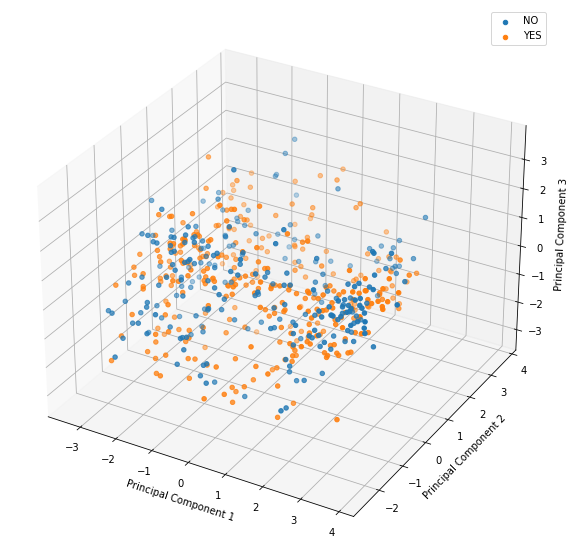

In [48]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

classes = {0: 'NO', 1: 'YES'}
for label in range(0, 2):
    label_name = classes[label]
    coords = data_pca_train_3_full[data_pca_train_3_full['HeartDisease']==label]
    x = coords['PC1'].values
    y = coords['PC2'].values
    z = coords['PC3'].values
    ax.scatter3D(x, y, z, label=label_name)
    
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()

In [37]:
best_K = {}
train = 0
K_2 = 0

# We want find best K for classification then we choose a range and check any of them. After that we compare Accuracy of them and choose best.
for k in range(2, 21):
    #if we don't use a specific K, defult is 5 
    clf = KNeighborsClassifier(n_neighbors = k, p = 2)
    clf.fit(data_pca_train_2, y_train)
    y_pred_2 = clf.predict(data_pca_test_2)
    ac_2 = accuracy_score(y_test,y_pred_2)
    if ac_2 > train:
        K_2 = k
        train = ac_2
        best_K[k] = ac_2

In [38]:
print("best_K is: ", best_K)
print("K is: ", K_2)

best_K is:  {2: 0.7608695652173914, 3: 0.8478260869565217, 4: 0.8586956521739131, 5: 0.8858695652173914}
K is:  5


In [39]:
clf = KNeighborsClassifier(n_neighbors = K_2, p = 2)
clf.fit(data_pca_train_2, y_train)
y_pred_2 = clf.predict(data_pca_test_2)
ac_2 = accuracy_score(y_test,y_pred_2)
print("accuracy score is: ", ac_2)

accuracy score is:  0.8858695652173914


###### plot 2D

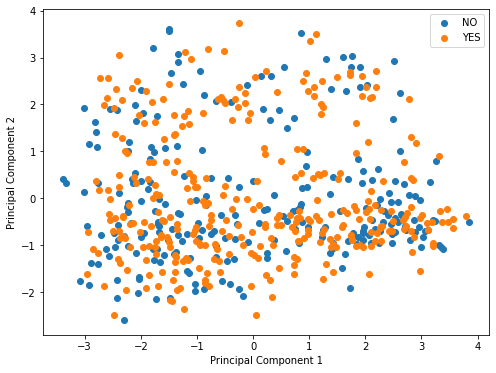

In [54]:
plt.figure(figsize=(8, 6))

classes = {0: 'NO', 1: 'YES'}
for label in range(0, 2):
    label_name = classes[label]
    coords = data_pca_train_2_full[data_pca_train_2_full['HeartDisease']==label]
    x = coords['PC1'].values
    y = coords['PC2'].values
    plt.scatter(x, y, label=label_name)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

## 2. clustering

###### For clustering this dataset I use K-means algorithm for train that.

In [55]:
from sklearn.cluster import KMeans

In [108]:
data3 = pd.read_csv('heart.csv')
data3['Sex'] = pd.get_dummies(data3.Sex)['F']
data3 = pd.concat([data3,pd.get_dummies(data3.ChestPainType)], axis = 1)
data3.drop(['ChestPainType', 'ASY'], axis=1, inplace = True)
data3 = pd.concat([data3,pd.get_dummies(data3.RestingECG)], axis = 1)
data3.drop(['RestingECG', 'ST'], axis=1, inplace = True)
data3['ExerciseAngina'] = pd.get_dummies(data3.ExerciseAngina)['Y']
data3 = pd.concat([data3,pd.get_dummies(data3.ST_Slope)], axis = 1)
data3.drop(['ST_Slope', 'Down'], axis=1, inplace = True)
main_cols = ['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ATA', 'NAP', 'TA', 'LVH', 'Normal', 'Flat', 'Up', 'HeartDisease']
data3 = data3.reindex(columns = main_cols)

In [109]:
data3.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ATA,NAP,TA,LVH,Normal,Flat,Up,HeartDisease
0,40,0,140,289,0,172,0,0.0,1,0,0,0,1,0,1,0
1,49,1,160,180,0,156,0,1.0,0,1,0,0,1,1,0,1
2,37,0,130,283,0,98,0,0.0,1,0,0,0,0,0,1,0
3,48,1,138,214,0,108,1,1.5,0,0,0,0,1,1,0,1
4,54,0,150,195,0,122,0,0.0,0,1,0,0,1,0,1,0


In [110]:
data3.shape

(918, 16)

In [111]:
print(type(data3))
y_main = data3['HeartDisease']
data3.drop(['HeartDisease'], axis=1, inplace = True)
data3.head()

<class 'pandas.core.frame.DataFrame'>


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ATA,NAP,TA,LVH,Normal,Flat,Up
0,40,0,140,289,0,172,0,0.0,1,0,0,0,1,0,1
1,49,1,160,180,0,156,0,1.0,0,1,0,0,1,1,0
2,37,0,130,283,0,98,0,0.0,1,0,0,0,0,0,1
3,48,1,138,214,0,108,1,1.5,0,0,0,0,1,1,0
4,54,0,150,195,0,122,0,0.0,0,1,0,0,1,0,1


In [112]:
kmeans = KMeans(n_clusters=2, random_state=1234) 
kmeans.fit(data3)
y_kmeans = kmeans.labels_
print(y_kmeans)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1
 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0
 0 1 0 0 1 1 1 1 1 1 1 0 

In [113]:
ac_kmeans = accuracy_score(y_main,y_kmeans)
print("Accuracy is: ", ac_kmeans)

Accuracy is:  0.40631808278867104


###### In KNN we have accuracy of 0.91 but accuracy in K-means is 0.40 that it is very low. So we can understand that this model isn't optimal at all.

## 3. Which of the k-means, Agglomerative, DBSCAN models in unsupervised learning clustering is more accurate?

In [114]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [128]:
best_model = {}

In [130]:
kmeans = KMeans(n_clusters=2, random_state=1234) 
kmeans.fit(data3)
y_kmeans = kmeans.labels_
ac_kmeans = accuracy_score(y_main,y_kmeans)
best_model["K-means"] = ac_kmeans
print("accuracy is: ", ac_kmeans)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


accuracy is:  0.40631808278867104


In [131]:
agglomerative = AgglomerativeClustering(n_clusters=2)
agglomerative.fit(data3)
y_agglomerative = agglomerative.labels_
ac_agglomerative = accuracy_score(y_main,y_agglomerative)
best_model["Agglomerative"] = ac_agglomerative
print("accuracy is: ", ac_agglomerative)

accuracy is:  0.5904139433551199


In [132]:
best_ac_DBSCAN = 0
best_db = {}
for i in np.arange(0.5, 50, 0.5):
    for j in range(1, 20):
        DBSCAN_a = DBSCAN(eps=i, min_samples=j)
        DBSCAN_a.fit(data3)
        y_DBSCAN_a = DBSCAN_a.labels_
        ac_DBSCAN = accuracy_score(y_main,y_DBSCAN_a)
        if ac_DBSCAN > best_ac_DBSCAN:
            best_ac_DBSCAN = ac_DBSCAN
            best_db[i] = j

best_model["DBSCAN"] = best_ac_DBSCAN
print("best accuracy is: ", best_ac_DBSCAN)
print("best list of eps and min_samples is: ", best_db)

best accuracy is:  0.5860566448801743
best list of eps and min_samples is:  {0.5: 1, 1.5: 2, 5.0: 3, 6.5: 5, 7.0: 5, 7.5: 5, 8.5: 6, 9.0: 6, 9.5: 7, 10.0: 7, 10.5: 7, 11.0: 8, 11.5: 3, 12.0: 3, 12.5: 3, 13.0: 3, 13.5: 4, 14.0: 1, 14.5: 3, 15.0: 2, 15.5: 7, 16.0: 7, 16.5: 7, 17.0: 8, 17.5: 8, 18.0: 8, 19.0: 4, 19.5: 4, 20.0: 4, 20.5: 5, 21.0: 5, 21.5: 5, 22.0: 5, 22.5: 5, 23.0: 3, 25.5: 4, 26.0: 4, 27.0: 4, 27.5: 4, 28.5: 2, 32.0: 3, 32.5: 3, 36.5: 5}


In [133]:
print(best_model)

{'Agglomerative': 0.5904139433551199, 'K-means': 0.40631808278867104, 'DBSCAN': 0.5860566448801743}


In [134]:
name_mo = ''
ac_mo = 0
for n in best_model:
    if best_model[n] > ac_mo:
        name_mo = n
        ac_mo = best_model[n]

print("For this data, {0} has more accuracy that it is equal to {1}.".format(name_mo, ac_mo))

For this data, Agglomerative has more accuracy that it is equal to 0.5904139433551199.


###### For this data, Agglomerative has more accuracy that it is equal to 0.5904139433551199.

# Season 3

## 1. Checking the normality of a column using statistical tests and QQ-plot

###### IN this case I use shapiro-wilk test to find that that column are from normal distribution or not.

###### Shapiro-Wilk test is a test of normality, it determines whether the given sample comes from the normal distribution or not. Shapiro-Wilk’s test or Shapiro test is a normality test in frequentist statistics. The null hypothesis of Shapiro’s test is that the population is distributed normally.

In [26]:
from scipy.stats import shapiro
import statsmodels.api as sm
import pylab as py

In [40]:
test_column = data['Cholesterol']

In [41]:
s_test = shapiro(test_column)
print(s_test)

ShapiroResult(statistic=0.8705924153327942, pvalue=6.972669126282614e-27)


In [42]:
if s_test.pvalue < 0.05:
    print("We can say this data does not come from a normal distribution.")

We can say this data does not come from a normal distribution.


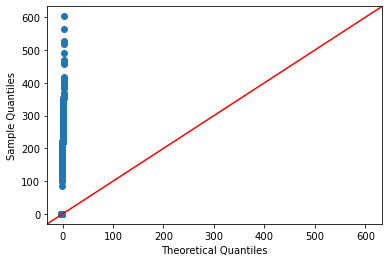

In [43]:
sm.qqplot(test_column, line ='45')
py.show()

In [24]:
test_column = data['MaxHR']

In [25]:
s_test = shapiro(test_column)
print(s_test)

ShapiroResult(statistic=0.992672860622406, pvalue=0.00016854831483215094)


In [27]:
if s_test.pvalue < 0.05:
    print("We can say this data does not come from a normal distribution.")

We can say this data does not come from a normal distribution.


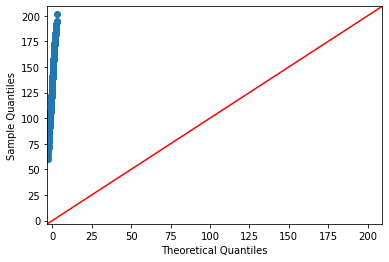

In [32]:
sm.qqplot(test_column, line ='45')
py.show()

###### We find out these two columns does not come from a normal distribution.

## 2. Checking the independence of the data of two columns

###### Mathematically, a Chi-Square test is done on two distributions two determine the level of similarity of their respective variances. In its null hypothesis, it assumes that the given distributions are independent. This test thus can be used to determine the best features for a given dataset by determining the features on which the output class label is most dependent on.

In [44]:
from scipy.stats import chi2_contingency

In [61]:
d1 = data['Cholesterol']
d2 = data['Sex']

In [70]:
# For use chi2_contingency we must first put 2 columns at a list with "crosstab".
crosstab = pd.crosstab(d1, d2)
stat,p,dof,expec = chi2_contingency(crosstab)
if p <= 0.05:
    print('Dependent')
else:
    print('Independent')

Dependent


## 3. Checking the data distribution of a column

###### In this part  we can check some parameters at a column. Like Density, Frequency, Max, Min and  Amount of each value in a column. 

In [78]:
from collections import Counter

<AxesSubplot:ylabel='Density'>

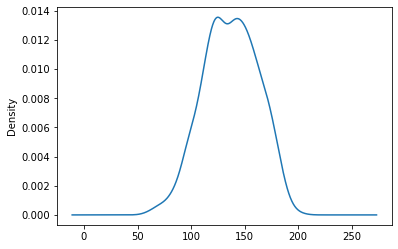

In [82]:
# Plot of density of MaxHR:
data['MaxHR'].plot(kind='kde')

<AxesSubplot:ylabel='Frequency'>

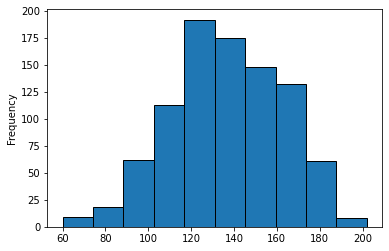

In [75]:
data['MaxHR'].plot(kind='hist', edgecolor='black')

In [81]:
# Minimum value:
data['MaxHR'].min()

60

In [80]:
# Maximum value:
data['MaxHR'].max()

202

In [79]:
# amount of each parameter:
Counter(data['MaxHR'])

Counter({172: 10,
         156: 10,
         98: 9,
         108: 8,
         122: 20,
         170: 20,
         142: 14,
         130: 33,
         120: 36,
         99: 7,
         145: 14,
         140: 41,
         137: 7,
         150: 43,
         166: 5,
         165: 11,
         125: 21,
         160: 25,
         164: 4,
         138: 14,
         178: 6,
         112: 13,
         118: 12,
         127: 8,
         114: 6,
         154: 12,
         155: 14,
         87: 1,
         148: 11,
         100: 14,
         168: 8,
         184: 4,
         121: 5,
         153: 5,
         134: 6,
         96: 7,
         174: 7,
         175: 10,
         144: 13,
         82: 3,
         135: 15,
         115: 16,
         128: 14,
         116: 9,
         94: 4,
         110: 23,
         92: 6,
         180: 10,
         152: 11,
         124: 9,
         106: 5,
         185: 4,
         139: 6,
         190: 2,
         146: 6,
         158: 8,
         132: 11,
         

## 4. Investigating the linear relationship between two columns using statistical parameters

###### t_statistic: Such a test tells us whether two data samples have different means. Here, we take the null hypothesis that both groups have equal means. We don’t need a known population parameter for this.
###### It turns out that the two-sample analysis using the t-test is equivalent to the analysis of the correlation coefficient using the t-test.
###### orrelation is used to summarize the strength and direction of the linear association between two quantitative variables. It is denoted by r and values between -1 and +1. A positive value for r indicates a positive association, and a negative value for r indicates a negative association.
###### f_statistic: F-statistics can also be thought of as a measure of the correlation between genes drawn at different levels of a (hierarchically) subdivided population. This correlation is influenced by several evolutionary processes, such as genetic drift, founder effect, bottleneck, genetic hitchhiking, meiotic drive, mutation, gene flow, inbreeding, natural selection, or the Wahlund effect, but it was originally designed to measure the amount of allelic fixation owing to genetic drift.
###### p-value: The value of 0.X tells us there’s a X% chance that the sample data is such far apart for two identical groups. This is greater than the 5% confidence level.

In [90]:
from scipy.stats import ttest_ind
import scipy.stats

In [84]:
d1 = data['Cholesterol']
d2 = data['Sex']

In [85]:
ttest_ind(d1,d2)

Ttest_indResult(statistic=55.007239160578294, pvalue=0.0)

In [92]:
def f_test(group1, group2):
    f = np.var(group1, ddof=1)/np.var(group2, ddof=1)
    nun = d1.size-1
    dun = d2.size-1
    p_value = 1-scipy.stats.f.cdf(f, nun, dun)
    return f, p_value
  
f_test(d2, d1)

(1.3892312669796133e-05, 1.0)

###### According to the obtained values, it can be understood that these two columns do not have a linear relationship with each other.

# Thanks for your attention.